In [ ]:
import os 
import numpy as np 
import pandas as pd 
import zipfile 
import tensorflow as tf 
from tensorflow import keras 
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile 
import pandas as pd
zf = zipfile.ZipFile('/content/gdrive/MyDrive/amazon_reviews.zip') 
df = pd.read_csv(zf.open('Reviews.csv'))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
# import pandas as pd
# import tarfile
# import json

# with tarfile.open("/content/gdrive/MyDrive/review.tar.gz", "r:*") as tar:
  
#   #print(tar.extractall())
#   with open(tar.getnames()[0], "rb") as r:
#     print(str(r.read(), 'ascii'))
#   #review_df = pd.read_csv(tar.extractfile(csv_path), header=0, sep=" ")


In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df.ProfileName.fillna(value = "", inplace = True)
df.Summary.fillna(value = "", inplace = True)
df["Reviews"] = df["Summary"] + " " + df["Text"]
# df.head(50)


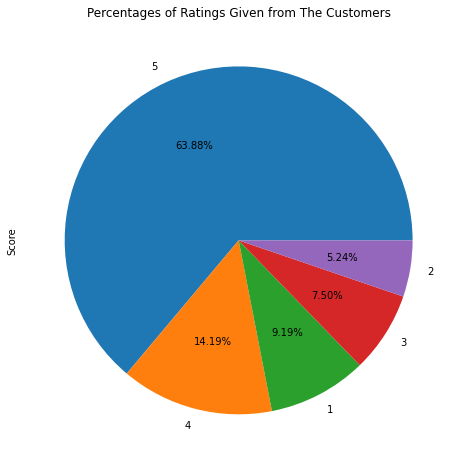

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
df.Score.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

In [ ]:
def identify_sentiment(val):
  if (val<3):
    entry='negative'
  elif (val==3):
    entry='neutral'
  else:
    entry='positive'
  return entry


df['Sentiment']= df['Score'].apply(lambda x: identify_sentiment(x))
# df.head(50)

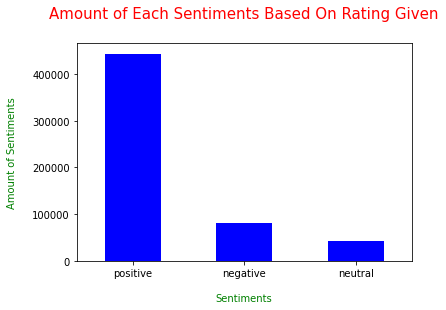

In [ ]:
df["Sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
df["Sentiment"].value_counts()

positive    443777
negative     82037
neutral      42640
Name: Sentiment, dtype: int64

In [ ]:
# Remove neutral reviews from dataframe because they're not a significant number of them 
df.drop(df.index[df['Sentiment'] == 'neutral'], inplace=True)

In [ ]:
df["Sentiment"].value_counts()

positive    443777
negative     82037
Name: Sentiment, dtype: int64

In [ ]:
# def cleaned_text(text):
#    text=text.lower()
import re
import string


def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['Cleaned_1']=df['Reviews'].apply(lambda x: clean_text(x))
df['Cleaned_1'].head(10)
# df.head(10)



0    good quality dog food i have bought several of...
1    not as advertised product arrived labeled as j...
2    delight says it all this is a confection that ...
3    cough medicine if you are looking for the secr...
4    great taffy great taffy at a great price  ther...
5    nice taffy i got a wild hair for taffy and ord...
6    great  just as good as the expensive brands th...
7    wonderful tasty taffy this taffy is so good  i...
8    yay barley right now im mostly just sprouting ...
9    healthy dog food this is a very healthy dog fo...
Name: Cleaned_1, dtype: object

In [ ]:
df['Cleaned_1'].head(10)

0    good quality dog food i have bought several of...
1    not as advertised product arrived labeled as j...
2    delight says it all this is a confection that ...
3    cough medicine if you are looking for the secr...
4    great taffy great taffy at a great price  ther...
5    nice taffy i got a wild hair for taffy and ord...
6    great  just as good as the expensive brands th...
7    wonderful tasty taffy this taffy is so good  i...
8    yay barley right now im mostly just sprouting ...
9    healthy dog food this is a very healthy dog fo...
Name: Cleaned_1, dtype: object

In [ ]:
df1 = df[['Sentiment','Cleaned_1']]
df1.shape

(525814, 2)

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(ENGLISH_STOP_WORDS)

frozenset({'should', 'where', 'serious', 'ourselves', 'after', 'many', 'one', 'top', 'wherein', 'whatever', 'am', 'co', 'whoever', 'your', 'or', 'for', 'our', 'of', 'into', 'less', 'hence', 'over', 'although', 'will', 'not', 'else', 'have', 'only', 'give', 'mill', 'full', 'ever', 'whither', 'mostly', 'do', 'she', 'everyone', 'thru', 'namely', 'mine', 'his', 'most', 'etc', 'meanwhile', 'has', 'among', 'yours', 'take', 'couldnt', 'off', 'because', 'beyond', 'put', 'about', 'fifty', 'five', 'moreover', 'forty', 'herself', 'whether', 'they', 'it', 'since', 'already', 'nor', 'who', 'whenever', 'could', 'everything', 'yet', 'done', 'until', 'its', 'name', 'whence', 'below', 'due', 'wherever', 'via', 'least', 'alone', 'been', 'both', 'thin', 'anyway', 'system', 'ours', 'whom', 'each', 'all', 'some', 'noone', 'you', 'under', 'same', 'nevertheless', 'whereupon', 'none', 'was', 'from', 'show', 'an', 'above', 'amongst', 'hereafter', 'being', 'even', 'behind', 'before', 'were', 'somewhere', 'inter

In [ ]:

stop_words = frozenset({'mill', 'back', 'from', 'onto', 'ever', 'upon', 'because', 'co', 'would', 'during', 'nobody', 'i', 'until', 'bottom', 
                         'please', 'than', 'eight', 'do', 'everything', 'or', 'system', 'ie', 'is', 'our', 'every', 'nevertheless', 'un', 
                         'always', 'what', 'am', 'whose', 'before', 'may', 'inc', 'herein', 'many', 'only', 'something', 'mostly', 'such', 'describe', 
                         'get', 'together', 'latter', 'their', 'third', 'most', 'enough', 'which', 'serious', 'empty', 'ours', 'per', 'ten', 'he', 
                         'and', 'twenty', 'by', 'several', 'why', 'nothing', 'itself', 'mine', 'due', 'must', 'hence', 'all', 'becomes', 'within', 
                         'someone', 'neither', 'whether', 'same', 'forty', 'well', 'wherein', 'de', 'via', 'sixty', 'con', 'toward', 'indeed', 'we', 
                         'hasnt', 'next', 'who', 'first', 'the', 'her', 'eg', 'beside', 'latterly', 'fifty', 'thin', 'that', 'so', 'whereafter', 
                         'however', 'between', 'cry', 'can', 'with', 'you', 'part', 'keep', 'eleven', 'to', 'these', 'find', 'wherever', 
                         'has', 'also', 'anyway', 'therein', 'hereupon', 'it', 'himself', 'another', 'fill', 'seeming', 'anyone', 'less', 
                         'afterwards', 'she', 'its', 'then', 'whereby', 'see', 'whoever', 'six', 'there', 'will', 'against', 'without', 'whole', 'now',
                         'everyone', 'perhaps', 'move', 'any', 'of', 'already', 'formerly', 'hers', 'him', 'ltd', 'into', 'put', 'both', 'becoming',
                         'should', 'whenever', 'amoungst', 'somehow', 'three', 'how', 'was', 'amount', 'yourselves', 'themselves', 'often', 'up', 
                         'side', 'otherwise', 'be', 'whatever', 'sincere', 'seems', 'out', 'two', 'hundred', 'interest', 'everywhere', 'other', 
                         'where', 'off', 'nor', 'else', 'top', 'cant', 'might', 'except', 'amongst', 'on', 'anywhere', 'others', 'detail', 'name', 
                         'take', 'thence', 'whence', 'though', 'behind', 'more', 'my', 'beforehand', 'seem', 'thick', 'thru', 'sometime', 'somewhere',
                         'fifteen', 'meanwhile', 'thereafter', 'almost', 'done', 'yourself', 'seemed', 'as', 'bill', 'made', 'some', 'very', 'along', 
                          'above', 'ourselves', 'them', 'elsewhere', 'anything', 'none', 'are', 'once', 'nine', 'too', 'hereby', 'five',
                         'show', 'rather', 'through', 'below', 'yours', 'thereby', 'call', 'have', 'twelve', 'thereupon', 'when', 'own', 'after', 
                         'thus', 'front', 'down', 'namely', 'here', 'herself', 'either', 'myself', 'alone', 'whom', 'become', 'therefore', 'his',
                         'me', 'least', 'whereupon', 'for', 'a', 'anyhow', 'even', 'under', 'besides', 'etc', 'give', 'few', 'go', 'they', 'among', 
                         'full', 'were', 'former', 'us', 'four', 'much', 'hereafter', 'while', 'further', 'became', 'each', 'those', 'been', 'around', 
                         'being', 'since', 'towards', 're', 'nowhere', 'your', 'sometimes', 'whereas', 'noone', 'yet', 'throughout', 'over', 'found',
                         'although', 'at', 'across', 'moreover', 'couldnt', 'fire', 'about', 'last', 'had', 'an', 'one', 'but', 'again', 'this', 
                         'whither', 'in', 'if', 'beyond', 'still'})

#create your custom stop words list
def remove_stopwords(text):
  words = [word for word in text.split() if word not in stop_words]
  new_text = " ".join(words)
  return new_text

df1['Stopwords']=df1['Cleaned_1'].apply(lambda x: remove_stopwords(x))
df1.shape



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(525814, 3)

In [ ]:

df1['Stopwords'].head(10)


0    good quality dog food bought vitality canned d...
1    not advertised product arrived labeled jumbo s...
2    delight says confection centuries light pillow...
3    cough medicine looking secret ingredient robit...
4    great taffy great taffy great price wide assor...
5    nice taffy got wild hair taffy ordered pound b...
6    great just good expensive brands saltwater taf...
7    wonderful tasty taffy taffy good soft chewy fl...
8    yay barley right im just sprouting cats eat gr...
9    healthy dog food healthy dog food good digesti...
Name: Stopwords, dtype: object

In [ ]:
# from gensim.utils import simple_preprocess

# df1['tokenized'] = [simple_preprocess(line, deacc=True) for line in df1['Stopwords']] 
# df1['tokenized'].head(10)

In [ ]:
df1.head(10)

,Sentiment,Cleaned_1,Stopwords
0,positive,good quality dog food i have bought several of...,good quality dog food bought vitality canned d...
1,negative,not as advertised product arrived labeled as j...,not advertised product arrived labeled jumbo s...
2,positive,delight says it all this is a confection that ...,delight says confection centuries light pillow...
3,negative,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...
4,positive,great taffy great taffy at a great price ther...,great taffy great taffy great price wide assor...
5,positive,nice taffy i got a wild hair for taffy and ord...,nice taffy got wild hair taffy ordered pound b...
6,positive,great just as good as the expensive brands th...,great just good expensive brands saltwater taf...
7,positive,wonderful tasty taffy this taffy is so good i...,wonderful tasty taffy taffy good soft chewy fl...
8,positive,yay barley right now im mostly just sprouting ...,yay barley right im just sprouting cats eat gr...
9,positive,healthy dog food this is a very healthy dog fo...,healthy dog food healthy dog food good digesti...


    Encoding the positive reviews with 1 and the negative ones with 0. 
    



In [ ]:
def sentiment_rating(val):
  if (val=='positive'):
    entry=1
  else:
    entry=0
  return entry


df1['Sentiment_rating']= df1['Sentiment'].apply(lambda x: sentiment_rating(x))
# df.head(50)'].apply(lambda x: identify_sentiment(x))
df1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Sentiment,Cleaned_1,Stopwords,Sentiment_rating
0,positive,good quality dog food i have bought several of...,good quality dog food bought vitality canned d...,1
1,negative,not as advertised product arrived labeled as j...,not advertised product arrived labeled jumbo s...,0
2,positive,delight says it all this is a confection that ...,delight says confection centuries light pillow...,1
3,negative,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...,0
4,positive,great taffy great taffy at a great price ther...,great taffy great taffy great price wide assor...,1
5,positive,nice taffy i got a wild hair for taffy and ord...,nice taffy got wild hair taffy ordered pound b...,1
6,positive,great just as good as the expensive brands th...,great just good expensive brands saltwater taf...,1
7,positive,wonderful tasty taffy this taffy is so good i...,wonderful tasty taffy taffy good soft chewy fl...,1
8,positive,yay barley right now im mostly just sprouting ...,yay barley right im just sprouting cats eat gr...,1
9,positive,healthy dog food this is a very healthy dog fo...,healthy dog food healthy dog food good digesti...,1


In [ ]:
df1['Sentiment_rating'].value_counts()

1    443777
0     82037
Name: Sentiment_rating, dtype: int64

Looking at the value counts we can see that the data is pretty imbalanced with a lot more positive reviews than negative ones.

In [ ]:
df1.head(10)

,Sentiment,Cleaned_1,Stopwords,Sentiment_rating
0,positive,good quality dog food i have bought several of...,good quality dog food bought vitality canned d...,1
1,negative,not as advertised product arrived labeled as j...,not advertised product arrived labeled jumbo s...,0
2,positive,delight says it all this is a confection that ...,delight says confection centuries light pillow...,1
3,negative,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...,0
4,positive,great taffy great taffy at a great price ther...,great taffy great taffy great price wide assor...,1
5,positive,nice taffy i got a wild hair for taffy and ord...,nice taffy got wild hair taffy ordered pound b...,1
6,positive,great just as good as the expensive brands th...,great just good expensive brands saltwater taf...,1
7,positive,wonderful tasty taffy this taffy is so good i...,wonderful tasty taffy taffy good soft chewy fl...,1
8,positive,yay barley right now im mostly just sprouting ...,yay barley right im just sprouting cats eat gr...,1
9,positive,healthy dog food this is a very healthy dog fo...,healthy dog food healthy dog food good digesti...,1


In [ ]:
df1['Stopwords'].head()
# tokens

0    good quality dog food bought vitality canned d...
1    not advertised product arrived labeled jumbo s...
2    delight says confection centuries light pillow...
3    cough medicine looking secret ingredient robit...
4    great taffy great taffy great price wide assor...
Name: Stopwords, dtype: object

Creating a separate dataframe of the negative reviews in order to upsample them. 

In [ ]:

filtered_data = df1 [df1 ["Sentiment_rating"]==0] 
filtered_data.head(5)

,Sentiment,Cleaned_1,Stopwords,Sentiment_rating
1,negative,not as advertised product arrived labeled as j...,not advertised product arrived labeled jumbo s...,0
3,negative,cough medicine if you are looking for the secr...,cough medicine looking secret ingredient robit...,0
12,negative,my cats are not fans of the new food my cats h...,cats not fans new food cats happily eating fel...,0
16,negative,poor taste i love eating them and they are goo...,poor taste love eating good watching tv lookin...,0
26,negative,nasty no flavor the candy is just red no flav...,nasty no flavor candy just red no flavor just ...,0


The following code will increase the number of negative reviews to match that of the positive class. Upsampled_data is the merged dataframe that we get after upsampling. 

In [ ]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 

cls_majority =df1[(df1['Sentiment_rating']==1)] 
cls_minority = df1[(df1['Sentiment_rating']==0)] 

# upsample minority class
cls_minority_upsampled = resample(cls_minority, 
                                 replace=True,    #sample with replacement
                                 n_samples= 443777, #to match majority class
                                 random_state=42)  #reproducible results
# Combine majority class with upsampled minority class
upsampled_data = pd.concat([cls_minority_upsampled, cls_majority])

In [ ]:
upsampled_data.shape

(887554, 4)

The following cell shuffles all the rows in the merged datframe.  

In [ ]:
upsampled_data = upsampled_data.sample(frac=1).reset_index(drop=True)

In [ ]:
# upsampled_data.head(50)

Looking at the value counts again we can see that the imbalanced classes problem is now resolved. 

In [ ]:
upsampled_data['Sentiment_rating'].value_counts()

0    443777
1    443777
Name: Sentiment_rating, dtype: int64

In [ ]:
upsampled_data['Stopwords']

0         not fresh hard disappointed w product freshnes...
1         delicious husband gluten free diet months bisc...
2         tasty maybe beneficial midwife recommended pro...
3         mix chocolate hemp milk people havent able tol...
4         best service desperate receive raved product d...
                                ...                        
887549    best ginger ale awesome extremely intense flav...
887550    best using kcups years time tried dozen differ...
887551    beware product cause dogs getting sick ruining...
887552    outrageous price increase really careful buyin...
887553    fresh mixers small bowls quick hot meal busy f...
Name: Stopwords, Length: 887554, dtype: object

In the following cells The entire corpus is tokenised and stored in a list(story) of lists on which the Word2Vec model will be trained. The sent_tokenise method from NLTK library and simple_preprocess from gensim is used for 

In [ ]:
import gensim
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
from gensim.utils import simple_preprocess

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
story = []
for doc in upsampled_data['Stopwords']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [ ]:
print(story[:1])

[['not', 'fresh', 'hard', 'disappointed', 'product', 'freshness', 'excited', 'amazon', 'tasted', 'product', 'impressed', 'good', 'tasty', 'soft', 'recd', 'boxes', 'opened', 'really', 'excited', 'experience', 'foodgasm', 'got', 'introduced', 'fruit', 'barfirst', 'bite', 'food', 'nightmare', 'boxes', 'bars', 'dont', 'feel', 'like', 'consumingit', 'stale', 'hardwhat', 'waste']]


The Word2Vec model object is made with a word window of 5 words(one center word and 2 words on either side of it), a minimum count of 50 and with the dimension of each word vector in the model given by MAX_LEN i.e. 100 in this case.  

In [ ]:
MAX_LEN=100
w2v_model = gensim.models.Word2Vec(min_count=50,
                     window=5,
                     size=MAX_LEN, workers=4)
                    #  sample=6e-5, 
                    #  alpha=0.03, 
                    #  min_alpha=0.0007, 
                    #  negative=20,workers=4)

In [ ]:
w2v_model.build_vocab(story, progress_per=10000)


Training the Word2Vec model( add more deets)

In [ ]:
w2v_model.train(story, total_examples=w2v_model.corpus_count, epochs=5, report_delay=1)

(162345370, 182076200)

In [ ]:
# from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec

word_vectors = w2v_model.wv

In [ ]:
from gensim.models import KeyedVectors
word_vectors.save('vectors.kv')
reloaded_word_vectors = KeyedVectors.load('vectors.kv')

In [ ]:
from gensim.models import KeyedVectors
# Store just the words + their trained embeddings.
word_vectors = w2v_model.wv
word_vectors.save("word2vec.wordvectors")
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector = wv['good']
print(vector)

[ 0.11088125  0.7311057  -0.10916169  0.91382676 -1.8138148   1.0251664
 -0.42955357 -2.4651225   2.150801    1.214153    0.38980004 -0.64588886
 -0.2964192   0.1768776   0.5161903   2.2934618   0.02430562 -1.3239555
 -0.07292688 -0.45836696 -0.3616982   0.16944705 -1.8864304  -1.2591571
 -1.0601817  -3.1277146  -1.9539937  -0.211269    0.34633142 -0.7739599
 -0.5404395   0.6628092  -0.54159594 -3.165716    1.3339692   0.39738345
  0.42152408  0.14424802 -1.2957295  -0.8955225   0.2799202   3.1981895
 -0.29841375  0.95394593  1.5539598  -2.705207   -1.1743448  -1.4519349
 -0.9677014  -1.4643544   0.9139383  -0.55836326 -0.60008705 -1.2930689
 -0.24208821 -0.80802745  0.14789447  1.9449153   0.8854854   0.68800527
  1.6500603  -1.0442159   0.17700757  0.02831104 -1.1005273  -1.9562225
  0.4379595  -0.7907813  -0.0374604  -0.01587401  2.280715   -1.5970067
  2.4563475   1.6521454   1.3239129   2.839858   -0.80753255 -0.07015117
 -1.1082157   0.94547963  2.0163214  -1.3223051   0.7458914 

In [ ]:
type(story)

list

Size of the vocab is defined by the Word2Vec model depending on the minimum word count specified earlier.  

In [ ]:
words = w2v_model.wv.vocab.keys()
w2v_vocab = len(words)
print("Vocab size", w2v_vocab)

Vocab size 20341


In [ ]:
w2v_model.wv.most_similar(positive=["decent"])

[('good', 0.7499016523361206),
 ('reasonable', 0.5948527455329895),
 ('great', 0.5651198625564575),
 ('better', 0.5593924522399902),
 ('inexpensive', 0.5517677664756775),
 ('comparable', 0.5276227593421936),
 ('cheap', 0.5271986722946167),
 ('nice', 0.5178136825561523),
 ('inline', 0.48408985137939453),
 ('goodbr', 0.4840465188026428)]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=w2v_vocab)
tokenizer.fit_on_texts(story)

token_vocab = len(tokenizer.word_index) + 1
print("Total words", token_vocab)
print("The document count",tokenizer.document_count)

Total words 203999
The document count 887553


In [ ]:

sequences = tokenizer.texts_to_sequences(upsampled_data['Stopwords'])
data = pad_sequences(sequences, maxlen= MAX_LEN,padding='post') 
print(data.shape) 


(887554, 100)


In [ ]:
print(data[1]) 


[   65   292   213    69   124   193  1191   141    56   193   124   286
    49   784   294 15807    20   138    15    28   213    69    14  1191
   292 13107   187     6   744   124     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


In [ ]:
data.shape

(887554, 100)

In [ ]:
sequences = tokenizer.texts_to_sequences(["good product "])
text = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')
print(text)

[[4 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# print(upsampled_data['Sentiment_rating'].head(50))
y = upsampled_data['Sentiment_rating']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=0)

In [ ]:
import numpy as np
print(w2v_vocab)
embedding_matrix = np.zeros((w2v_vocab +1, MAX_LEN))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix)

20341
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.20269518 -1.43183494 -0.13479824 ...  1.08685815 -0.79805183
  -0.62826443]
 [-0.67045313 -0.15562218 -0.67772228 ...  0.48427579 -2.52980042
   1.52564144]
 ...
 [-0.21251175 -0.67027313  0.02326156 ...  0.1033967   0.06796174
   0.07990099]
 [ 0.62250149 -0.06404798  0.12015792 ...  0.02241249  0.13257714
   0.13002591]
 [-0.44956303 -0.06441514  0.5523271  ... -0.47916779  0.24524871
  -0.38213292]]


In [ ]:
embedding_matrix.shape

(20342, 100)

In [ ]:
# To create the embedding matrix what you need to do is that iterate over each item in the numpy array 
# data and if you find a word which is there in the W2v vocab then keep it otherwise replace that spot with 0. 
# Checkout the to matrix function of keras tokenizer for this   

In [ ]:
from keras.layers.embeddings import Embedding
embedding_layer = Embedding(w2v_vocab+1,output_dim=MAX_LEN, weights=[embedding_matrix], input_length=MAX_LEN, trainable=False)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2034200   
                                                                 
 dropout (Dropout)           (None, 100, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,114,701
Trainable params: 80,501
Non-trainable params: 2,034,200
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
# callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              # EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=3,
                    validation_split=0.25,
                    verbose=1)
                    # callbacks=callbacks)

Epoch 1/3
562/976 [================>.............] - ETA: 2:24 - loss: 0.3596 - accuracy: 0.8348

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=512)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

In [ ]:
prediction= model.predict(X_test[200:210])
prediction

In [ ]:
y_test[200:210]

In [ ]:
# sequences = tokenizer.texts_to_sequences(["great product"])
# text = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')
# print(text)

In [ ]:
def model_pred(review):
  pred_value=model.predict(review)
  print(pred_value)
  if pred_value > 0.55:
    return ("Review indicates positive sentiment")
  else:
    return ("Review indicates negative sentiment")

In [ ]:
def clean_tokenise_input_webapp(review):
  
  review= clean_text(review)
  review= remove_stopwords(review)
  print (review)
  sequences = tokenizer.texts_to_sequences([review])
  padded_text = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')
  print(padded_text)
  return padded_text

sample=clean_tokenise_input_webapp('This product works just half the time')
sentiment=model_pred(sample)
print(sentiment)

In [ ]:



# prediction=model_pred(sample)  


In [ ]:
import anvil.server

anvil.server.connect("7264EZ3XXM3RLXNHWPI5IJ66-BYEIJOUEW7I4QZYF")

@anvil.server.callable
def say_hello(name):

  print("Hello from your own machine: ----"+ name + "----")
  review=clean_tokenise_input_webapp(name)
  # print(review.shape)
  pred=model_pred(review)
  return pred
anvil.server.wait_forever()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
Hello from your own machine: ----Good book----
good book
[[   4 1703    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
[[0.95972896]]
Hello from your own machine: ----not that great----
not great
[[1 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0.04379806]]
Hello from your own 

KeyboardInterrupt: ignored

product works just half time
[[  6 307   7 168  20   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]
[[0.8837196]]
Review indicates positive sentiment
